# CHURN_DATASET

## To identify high-risk customers, understand the reasons behind churn, and provide actionable insights to enhance customer retention strategies.

#### Importing necessary libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [143]:
data= pd.read_csv(r'C:\Users\HP\Documents\Datasets\churn_dataset.csv')

In [144]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [145]:
data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


#### Data Description

In [148]:
data.shape

(440833, 12)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [152]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


#### Data Preprocessing
#### Handling missing values, duplicated values and checking for outliers

In [158]:
data.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [159]:
data[data.isna().any(axis= 1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
data.dropna(inplace= True)

In [162]:
data.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [163]:
data.duplicated().sum()

0

<Axes: title={'center': 'Outlier Detection using Boxplot'}>

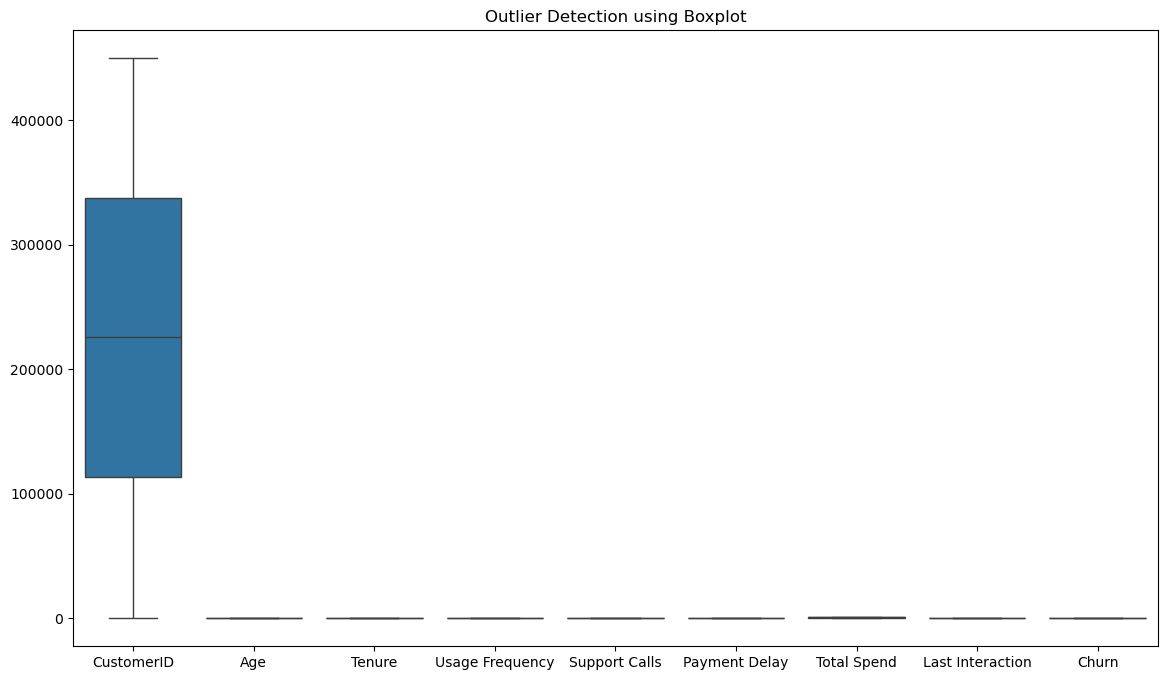

In [165]:
plt.figure(figsize= (14,8))
plt.title("Outlier Detection using Boxplot")
sns.boxplot(data)

#### Data Visualisation of different features with respect to target feature - CHURN
#### Graphs used - Bar Graph, Histogram, Pie Chart

In [171]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

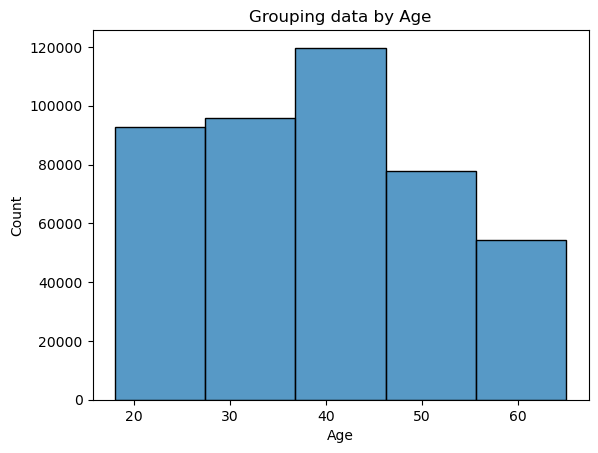

In [172]:
plt.title("Grouping data by Age")
sns.histplot(data['Age'], bins= 5)
plt.show()

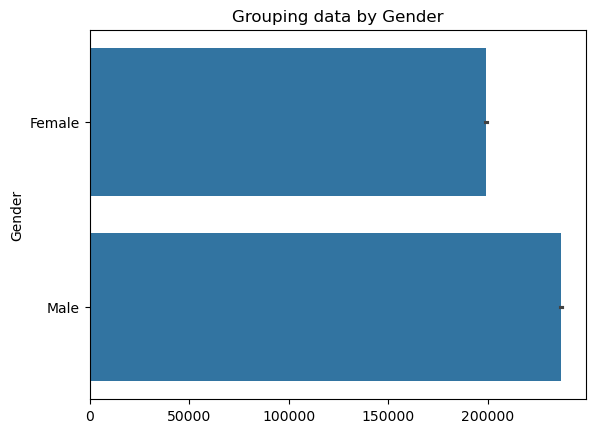

In [173]:
plt.title("Grouping data by Gender")
sns.barplot(data['Gender'])
plt.show()

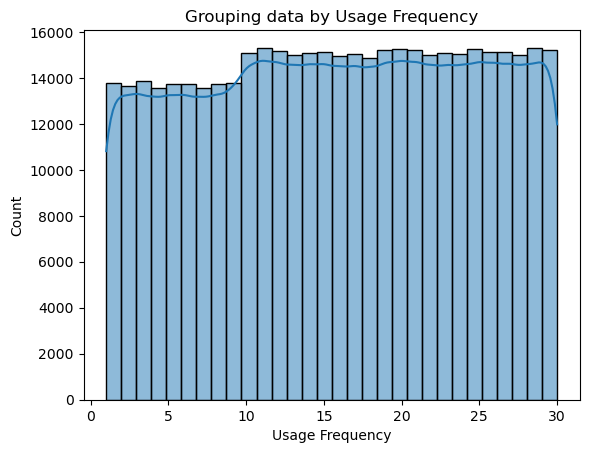

In [175]:
plt.title("Grouping data by Usage Frequency")
sns.histplot(data['Usage Frequency'], bins= 30, kde= True)
plt.show()

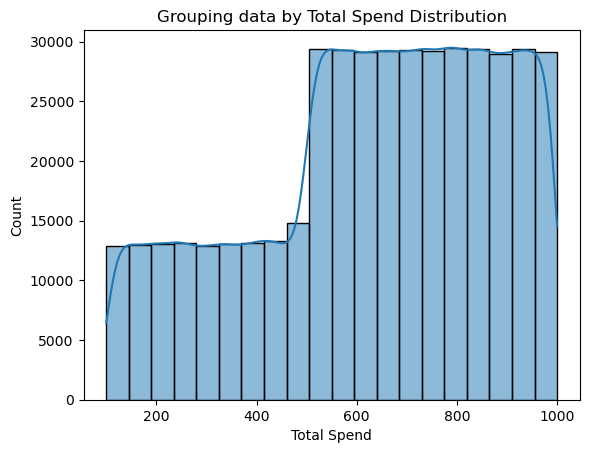

In [176]:
sns.histplot(data['Total Spend'], kde=True, bins=20)
plt.title('Grouping data by Total Spend Distribution')
plt.show()

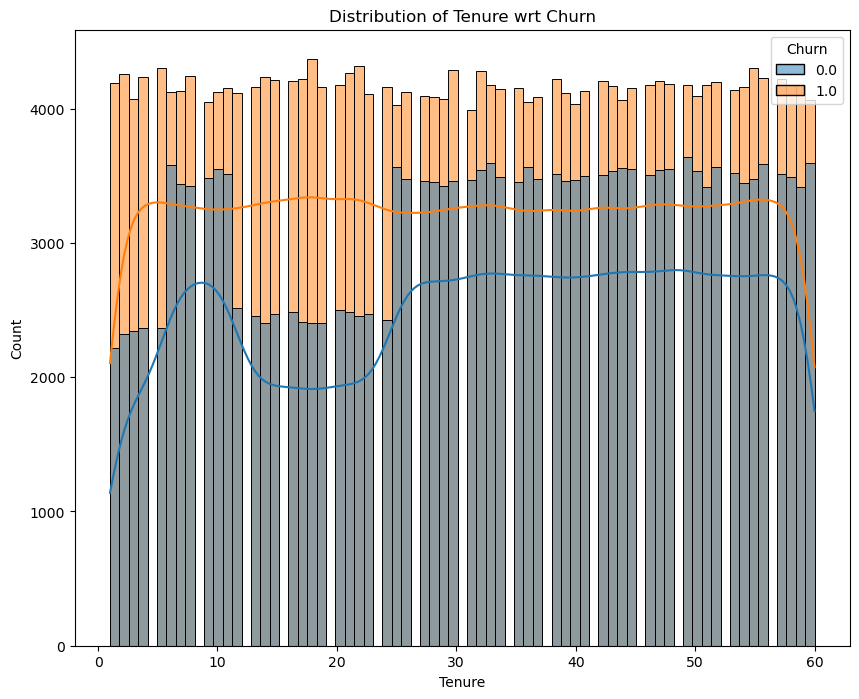

In [177]:
plt.figure(figsize= (10,8))
sns.histplot(data= data, x= data['Tenure'], hue= data['Churn'], kde= True)
plt.title('Distribution of Tenure wrt Churn')
plt.show()

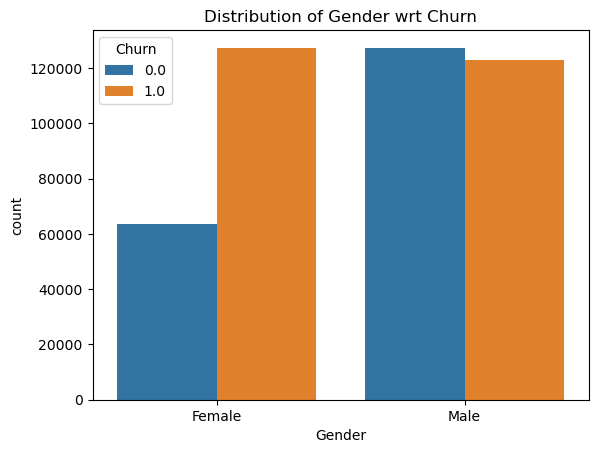

In [178]:
sns.countplot(data= data, x= data['Gender'], hue= data['Churn'])
plt.title('Distribution of Gender wrt Churn')
plt.show()

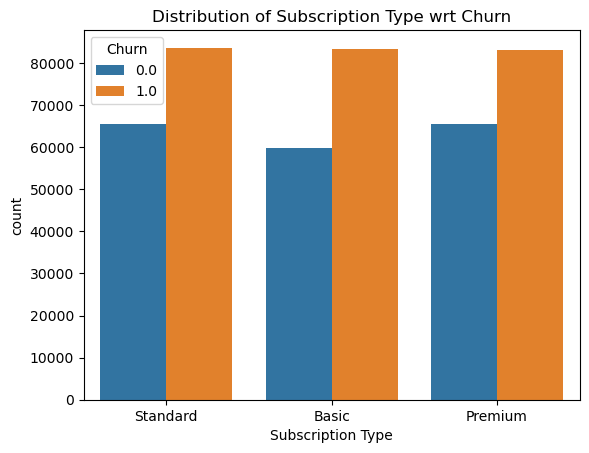

In [179]:
sns.countplot(data= data, x= data['Subscription Type'], hue= data['Churn'])
plt.title('Distribution of Subscription Type wrt Churn')
plt.show()

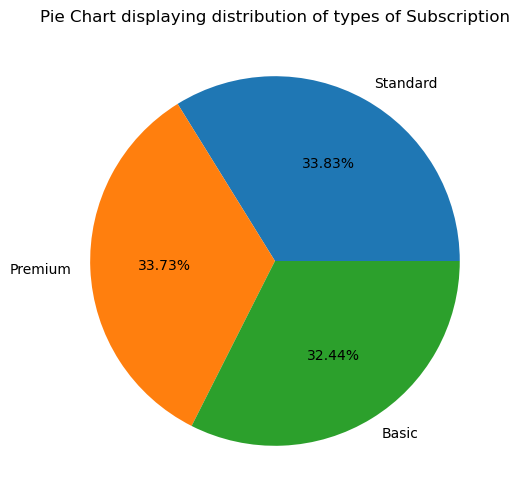

In [180]:
plt.figure(figsize=(6,6))
plt.pie(data['Subscription Type'].value_counts(),labels=['Standard', 'Premium', 'Basic'], autopct="%1.2f%%")
plt.title('Pie Chart displaying distribution of types of Subscription')
plt.show()

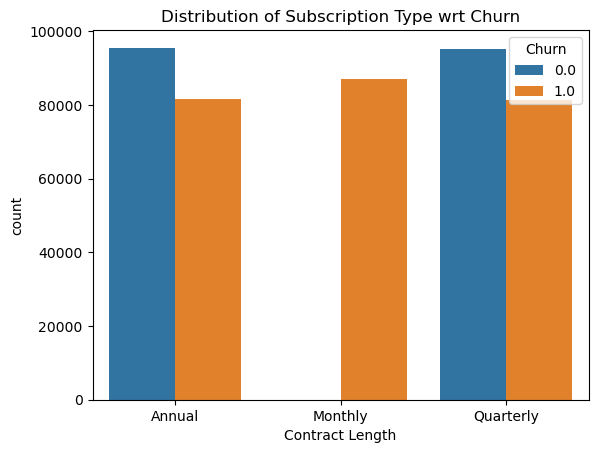

In [181]:
sns.countplot(data= data, x= data['Contract Length'], hue= data['Churn'])
plt.title('Distribution of Subscription Type wrt Churn')
plt.show()

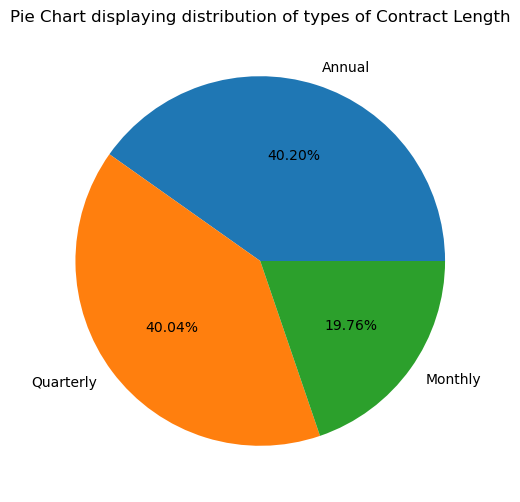

In [182]:
plt.figure(figsize=(6,6))
plt.pie(data['Contract Length'].value_counts(), labels= ['Annual', 'Quarterly', 'Monthly'], autopct="%1.2f%%")
plt.title('Pie Chart displaying distribution of types of Contract Length')
plt.show()

Text(0.5, 1.0, 'Distribution of Support Calls wrt Churn')

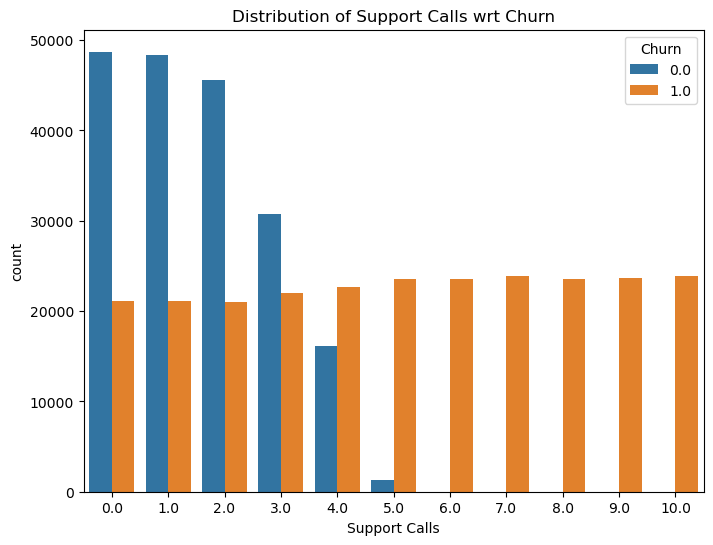

In [183]:
plt.figure(figsize= (8,6))
sns.countplot(data= data, x= data['Support Calls'], hue= data['Churn'])
plt.title('Distribution of Support Calls wrt Churn')

Text(0.5, 1.0, 'Distribution of Payment Delay wrt Churn')

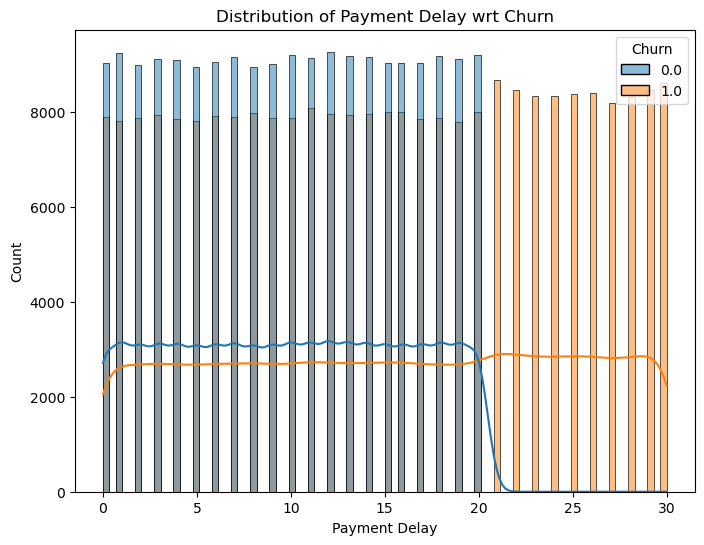

In [184]:
plt.figure(figsize= (8,6))
sns.histplot(data= data, x= data['Payment Delay'], hue= data['Churn'], kde= True)
plt.title('Distribution of Payment Delay wrt Churn')

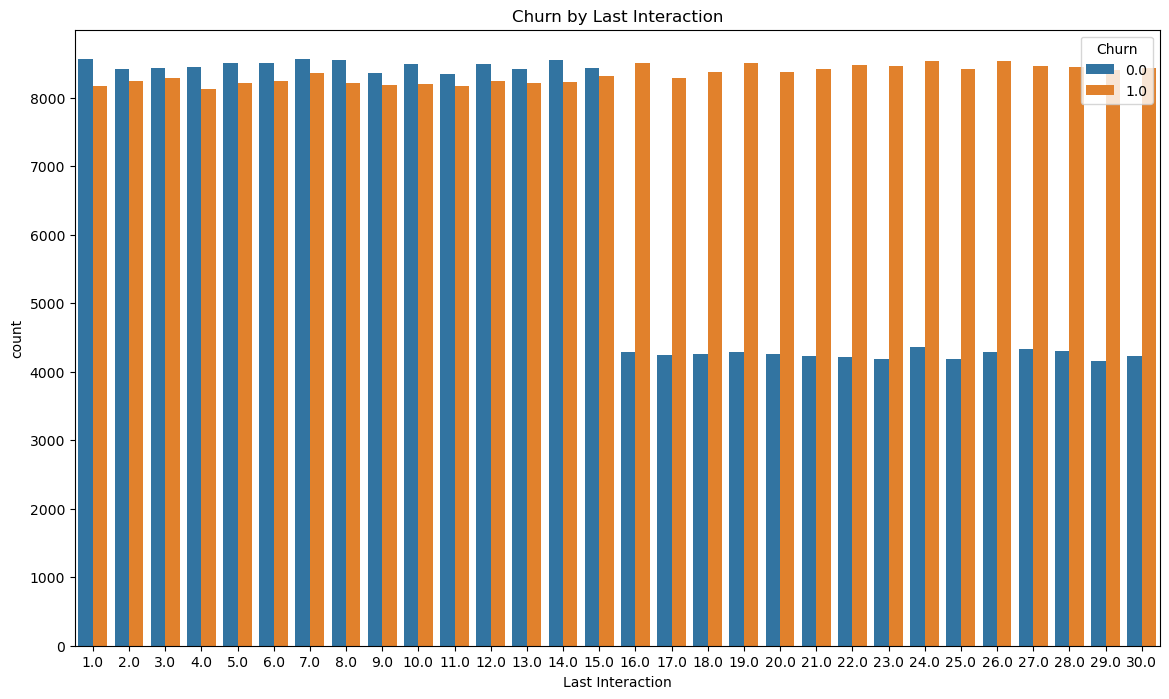

In [185]:
plt.figure(figsize= (14,8))
sns.countplot(x='Last Interaction', hue='Churn', data=data)
plt.title('Churn by Last Interaction')
plt.show()

#### Converting categorical data features to numerical values using LABEL ENCODER

In [188]:
cols= data.select_dtypes("object").columns
cols

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

In [189]:
le= LabelEncoder()
le

LabelEncoder()

In [190]:
data[cols]= data[cols].apply(le.fit_transform)

In [191]:
data.head(3)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0


#### CORRELATION AMONG FEATURES

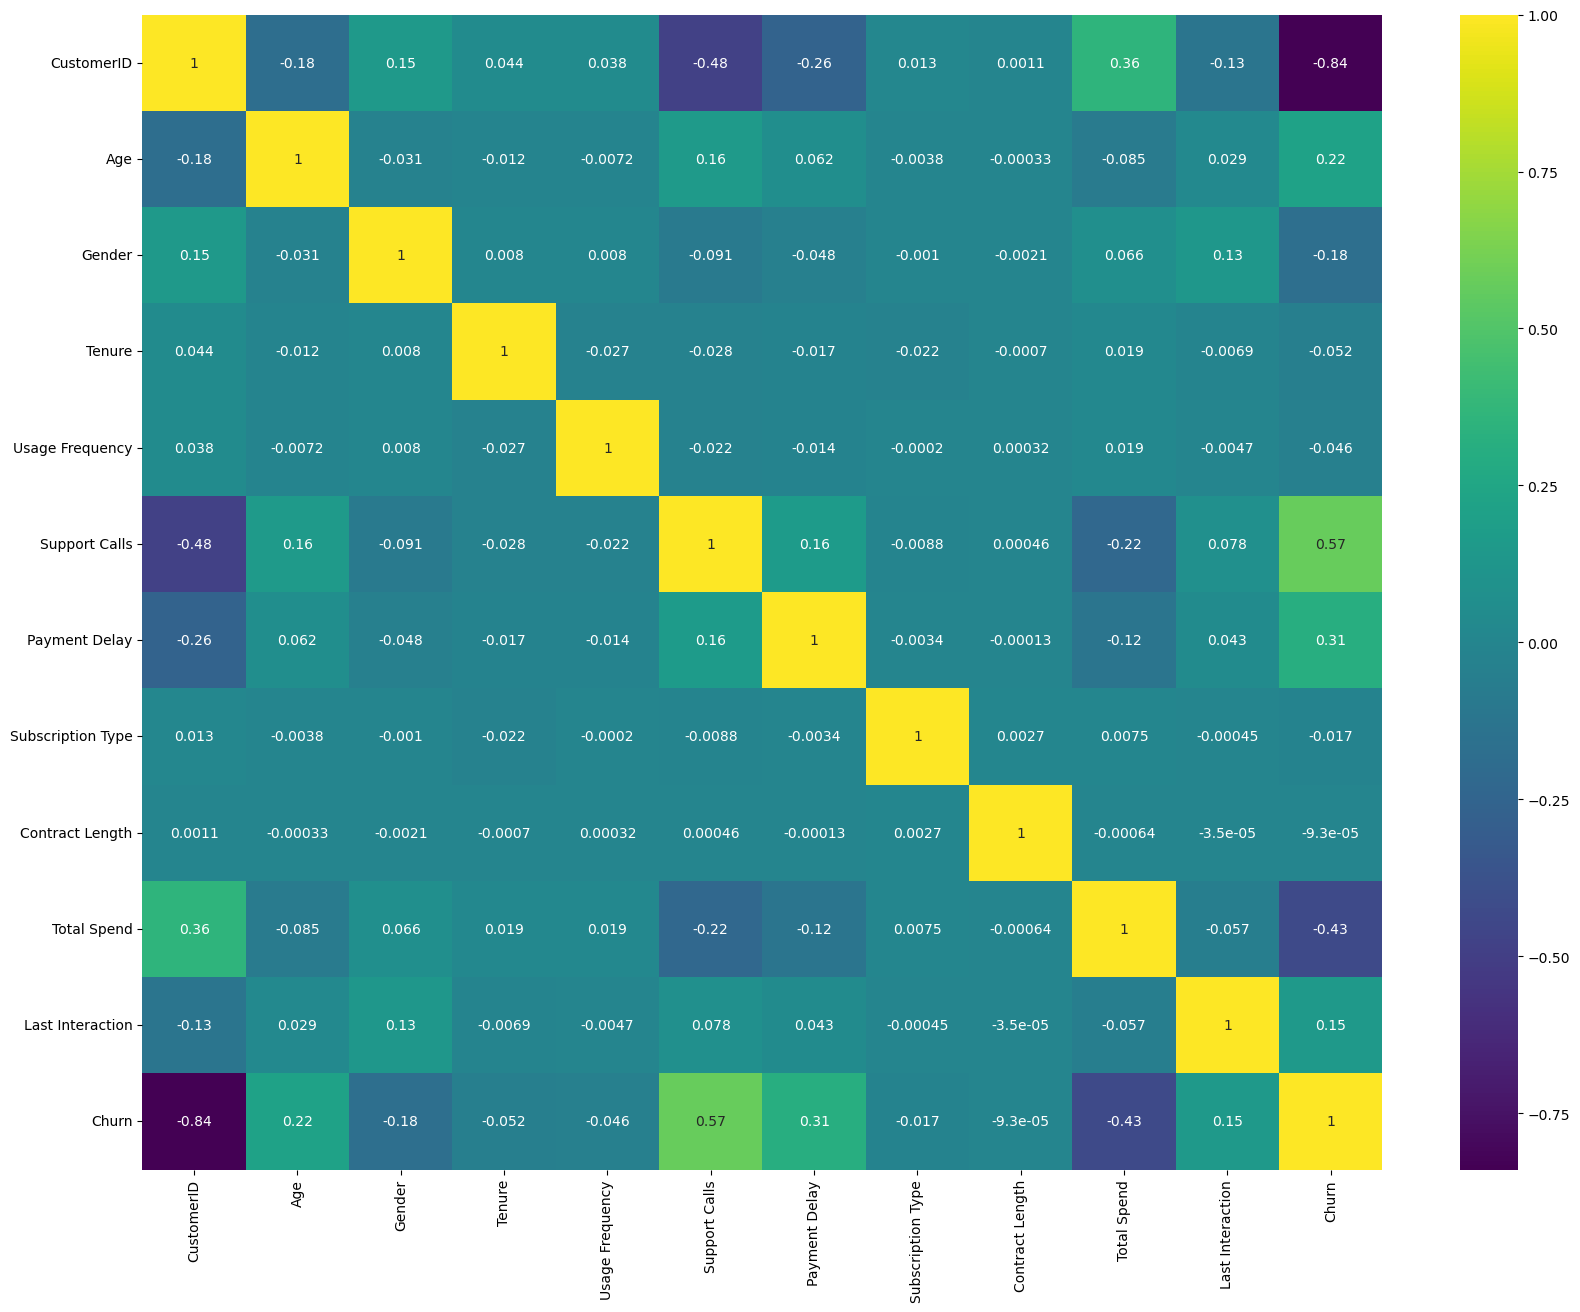

In [194]:
plt.figure(figsize= (20,15))
sns.heatmap(data.corr(), annot= True, cmap= 'viridis')
plt.show()

#### Using ML Algorithm - Logistic Regression

In [197]:
x = data.iloc[0:, 1:11]
y = data.iloc[0:, 11]

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [199]:
x_train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
118311,64.0,0,29.0,27.0,7.0,22.0,1,2,431.00,27.0
99593,40.0,0,35.0,10.0,4.0,19.0,0,0,161.00,26.0
233797,43.0,0,10.0,20.0,10.0,22.0,2,1,712.98,21.0
406431,46.0,1,51.0,28.0,4.0,10.0,2,2,595.44,15.0
138508,55.0,1,21.0,25.0,6.0,14.0,0,1,562.00,25.0
...,...,...,...,...,...,...,...,...,...,...
259179,41.0,1,44.0,18.0,2.0,13.0,1,0,717.39,3.0
365839,45.0,0,44.0,14.0,3.0,13.0,0,0,995.38,8.0
131932,37.0,0,9.0,4.0,10.0,12.0,0,1,979.00,8.0
146867,33.0,1,27.0,5.0,10.0,20.0,1,0,824.00,1.0


In [200]:
x_test

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
159565,23.0,0,10.0,16.0,8.0,16.0,1,2,589.00,13.0
127464,33.0,1,3.0,20.0,0.0,22.0,0,2,158.00,12.0
22398,27.0,0,57.0,3.0,0.0,24.0,2,0,915.00,26.0
99337,35.0,0,28.0,23.0,5.0,13.0,0,0,334.00,29.0
300997,28.0,1,53.0,30.0,2.0,5.0,0,0,568.86,15.0
...,...,...,...,...,...,...,...,...,...,...
174261,42.0,0,39.0,14.0,1.0,22.0,1,2,265.00,12.0
275893,44.0,1,51.0,20.0,1.0,19.0,2,0,814.62,6.0
43412,48.0,0,11.0,11.0,1.0,10.0,1,1,194.00,4.0
335844,27.0,1,12.0,25.0,2.0,18.0,0,2,524.34,16.0


In [201]:
y_train

118311    1.0
99593     1.0
233797    1.0
406431    0.0
138508    1.0
         ... 
259179    0.0
365839    0.0
131932    1.0
146867    1.0
121958    1.0
Name: Churn, Length: 308582, dtype: float64

In [202]:
y_test

159565    1.0
127464    1.0
22398     1.0
99337     1.0
300997    0.0
         ... 
174261    1.0
275893    0.0
43412     1.0
335844    0.0
162821    1.0
Name: Churn, Length: 132250, dtype: float64

In [203]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
y_pred = model.predict(x_test)

In [205]:
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

### Classification Report

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82     57160
         1.0       0.87      0.85      0.86     75090

    accuracy                           0.85    132250
   macro avg       0.84      0.84      0.84    132250
weighted avg       0.85      0.85      0.85    132250



In [208]:
# Classification Report provides useful metrics for evaluating the performance of the logistic regression model

# Precision(churn = 1): This tells how many of the customers predicted to churn actually did churn. A high precision means that accurate predictions about churn are made.
# Recall(churn = 1): This tells how many of the actual churners the model was able to identify. A high recall means you're catching most of the churners.
# F1-Score: This is the harmonic mean of precision and recall and provides a balance between the two. Higher F1 means better overall model performance.
# Support: This tells you how many instances there are for each class (churn and no churn)

#### Confusion Matrix

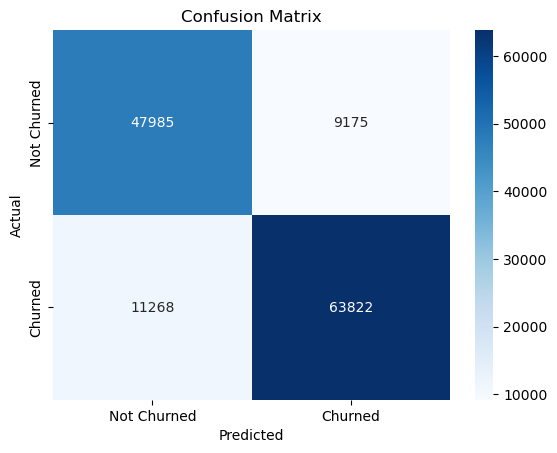

In [210]:
class_labels = ['Not Churned', 'Churned']
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [211]:
# Confusion Matrix shows the following-

# True Positives (TP): Correctly predicted churners.
# False Positives (FP): Customers predicted to churn but didn’t.
# True Negatives (TN): Correctly predicted non-churners.
# False Negatives (FN): Customers predicted not to churn but actually churned.

In [212]:
coefficients = pd.DataFrame(model.coef_, columns=x.columns, index=['Coefficient'])
coefficients

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
Coefficient,0.033157,-0.274102,-0.009334,-0.011777,0.759759,0.09619,-0.059596,-0.021883,-0.006103,0.029832


In [213]:
coefficients * 100

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
Coefficient,3.315734,-27.410164,-0.933376,-1.177722,75.975893,9.61904,-5.959609,-2.188315,-0.610282,2.983181


In [214]:
# Coefficients from the logistic regression model will tell you which features have the greatest influence on predicting churn.
# A positive coefficient indicates that as this feature increases, the likelihood of churn increases.
# A negative coefficient indicates that this feature reduces the likelihood of churn.

### Age: 3.315734 suggests that as Age increases, the likelihood of churn increases.
### Gender: -27.410164 suggests that Gender has an inverse relationship with churn. Female are more likely to churn than Males.
### Tenure: -0.933376 indicates that as Tenure (how long a customer has been with the company) increases, the likelihood of churn decreases.
### Usage Frequency: -1.177722 indicates that higher Usage Frequency (how often the customer uses the service) reduces the likelihood of churn.
### Support Calls: 75.975893 suggests that more support calls are strongly associated with higher churn. The large value indicates that customers who contact support frequently are at a high risk of churning.
### Payment Delay: 9.61904 indicates that Payment Delay increases the likelihood of churn, i.e., customers late on payments are more likely to churn.
### Subscription Type: -5.959609 tells that Premium customers are less likely to churn compared to Basic and Standard customers.
### Contract Length: -2.188315 indicates that customers with longer contracts are less likely to churn.
### Total Spend: -0.610282 indicates that higher spenders are less likely to churn, i.e., the more a customer spends, the lower is the churn rate.
### Last Interaction: 2.983181 suggests that customers who have interacted with the company recently are more likely to churn. This might indicate that the interaction was negative or that the interaction did not resolve their issue.